In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/adamaskari/Downloads/data_house.csv.zip')
df = df.drop(['yr_renovated', 'long', 'lat', 'date', 'Unnamed: 0', 'id'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [2]:
df['mean_zipcode_price'] = df.groupby('zipcode')['price'].transform('mean')
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21613 non-null  float64
 1   bedrooms            21613 non-null  int64  
 2   bathrooms           21613 non-null  float64
 3   sqft_living         21613 non-null  int64  
 4   sqft_lot            21613 non-null  int64  
 5   floors              21613 non-null  float64
 6   waterfront          21613 non-null  int64  
 7   view                21613 non-null  int64  
 8   condition           21613 non-null  int64  
 9   grade               21613 non-null  int64  
 10  sqft_above          21613 non-null  int64  
 11  sqft_basement       21613 non-null  int64  
 12  yr_built            21613 non-null  int64  
 13  zipcode             21613 non-null  int64  
 14  sqft_living15       21613 non-null  int64  
 15  sqft_lot15          21613 non-null  int64  
 16  mean

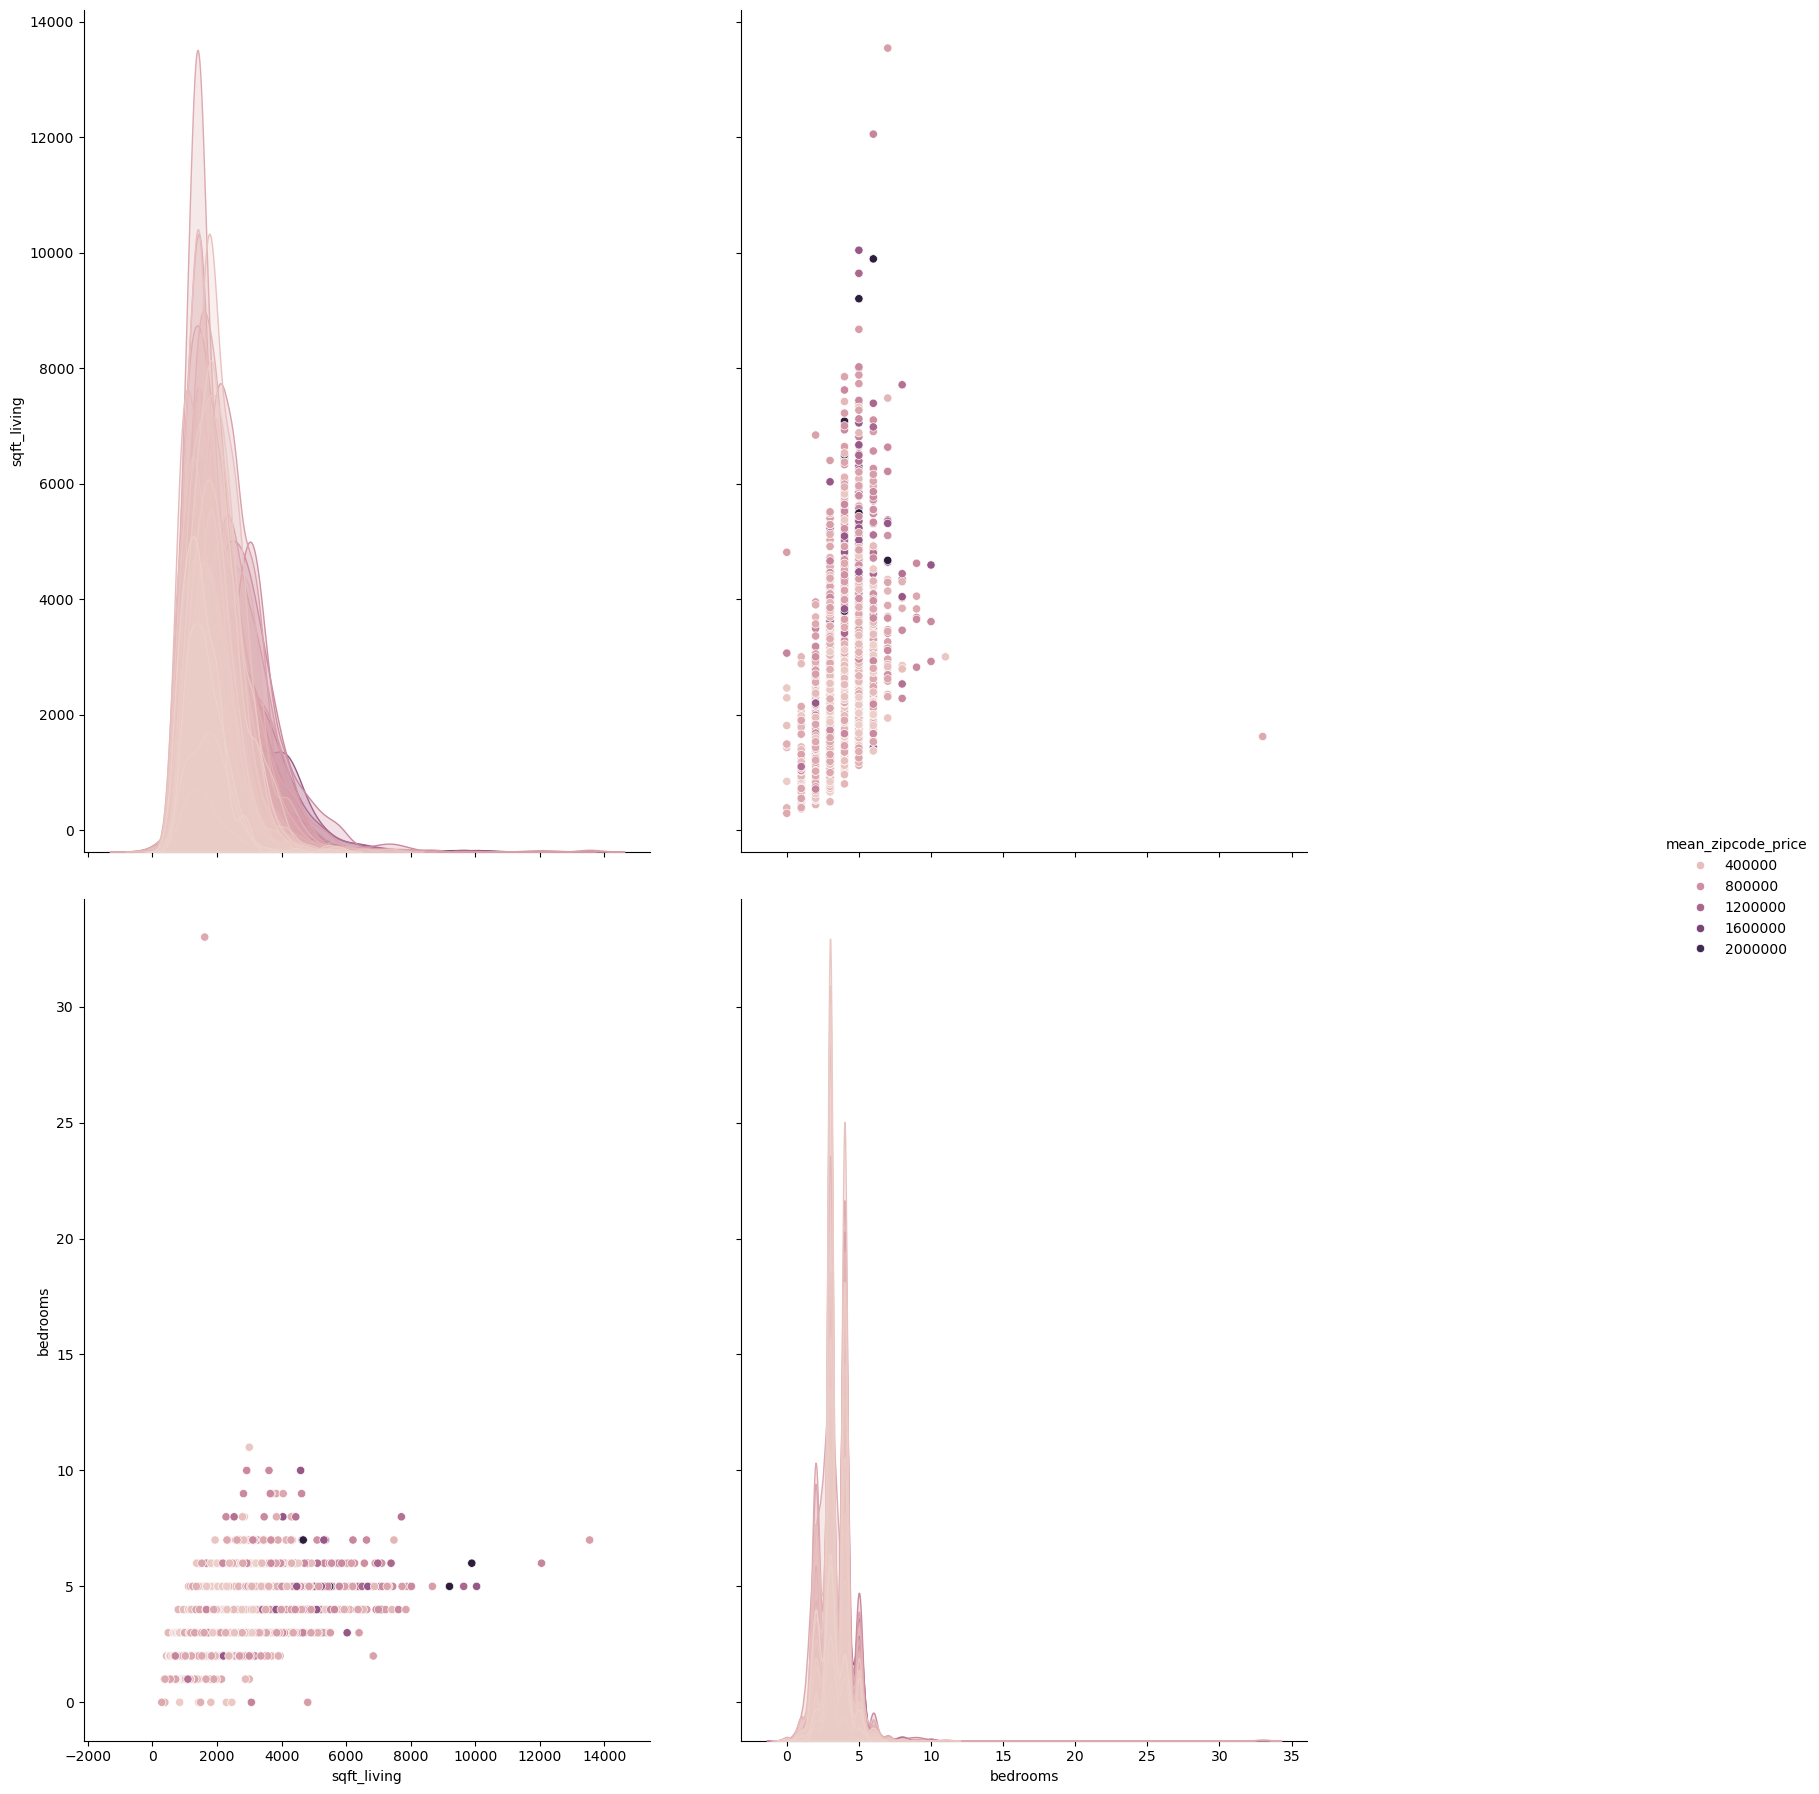

In [4]:

selected_columns = ["sqft_living", "mean_zipcode_price", "bedrooms"] 
g = sns.pairplot(df[selected_columns], hue="mean_zipcode_price")

g.fig.set_size_inches(20, 20)
plt.show()

In [5]:
features = df.drop(columns = ["price"])
target = df["price"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [7]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,98115,1770,6380,619900.547170
16909,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,98006,2310,9700,859684.779116
16123,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,98074,1710,9862,685605.775510
12181,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,98031,1970,7000,300539.890511
12617,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,98119,1790,4763,849448.016304


In [8]:
y_train.head()

5268     495000.0
16909    635000.0
16123    382500.0
12181    382500.0
12617    670000.0
Name: price, dtype: float64

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
pred = knn.predict(X_test)
pred

array([ 327133.66666667, 1038333.33333333,  490333.33333333, ...,
        407666.66666667,  288000.        ,  532666.66666667],
      shape=(4323,))

In [11]:
y_test.values

array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.],
      shape=(4323,))

In [12]:
knn.score(X_test, y_test)

0.703264691294633

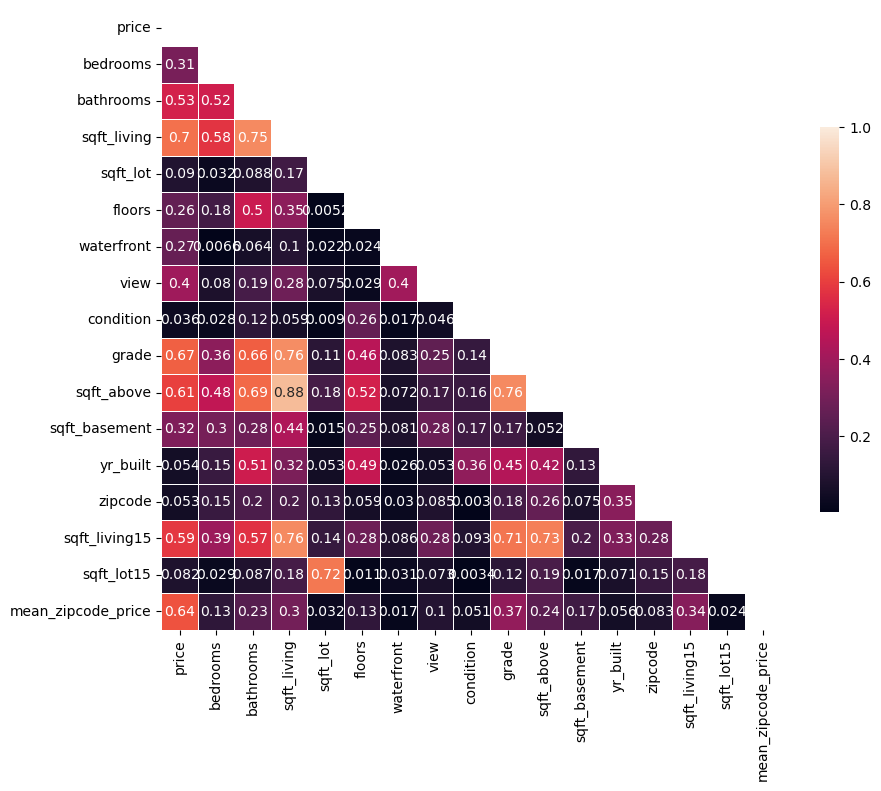

In [13]:
corr=np.abs(df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()

In [15]:
normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [16]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [17]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

X_train_reduced = X_train_norm.drop(columns=["sqft_living", "mean_zipcode_price", "bedrooms"])
X_test_reduced = X_test_norm.drop(columns=["sqft_living", "mean_zipcode_price", "bedrooms"])

In [18]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,98115,1770,6380,619900.547170
16909,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,98006,2310,9700,859684.779116
16123,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,98074,1710,9862,685605.775510
12181,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,98031,1970,7000,300539.890511
12617,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,98119,1790,4763,849448.016304


In [19]:
X_train_norm

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
0,0.090909,0.12500,0.096604,0.003023,0.0,0.0,0.0,0.75,0.500000,0.085526,0.103734,0.347826,0.575758,0.240063,0.006581,0.200183
1,0.090909,0.31250,0.112453,0.006348,0.0,0.0,0.0,0.75,0.583333,0.100877,0.118257,0.695652,0.025253,0.334617,0.010395,0.324660
2,0.090909,0.18750,0.060377,0.005659,0.0,0.0,0.0,0.50,0.583333,0.087719,0.000000,0.756522,0.368687,0.229557,0.010581,0.234292
3,0.121212,0.31250,0.144906,0.003973,0.4,0.0,0.0,0.50,0.583333,0.210526,0.000000,0.808696,0.151515,0.275083,0.007293,0.034395
4,0.090909,0.31250,0.113962,0.002570,0.4,0.0,0.0,0.50,0.500000,0.104167,0.116183,0.739130,0.595960,0.243565,0.004723,0.319346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0.151515,0.62500,0.276981,0.056680,0.4,0.0,0.0,0.50,0.750000,0.402412,0.000000,0.852174,0.186869,0.322360,0.073307,0.068827
17286,0.060606,0.31250,0.083774,0.000449,0.4,0.0,0.0,0.50,0.583333,0.095395,0.049793,0.939130,0.530303,0.115742,0.001003,0.044280
17287,0.090909,0.28125,0.156226,0.008741,0.0,0.0,0.0,0.75,0.666667,0.226974,0.000000,0.678261,0.207071,0.406409,0.015780,0.040153
17288,0.121212,0.25000,0.156981,0.046125,0.4,0.0,0.0,0.75,0.583333,0.228070,0.000000,0.678261,0.000000,0.299597,0.021461,0.024150


In [20]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,0.090909,0.31250,0.122264,0.002355,0.8,0.0,0.0,0.50,0.583333,0.177632,0.000000,0.930435,0.666667,0.264577,0.008619,0.079277
16909,0.090909,0.28125,0.110189,0.007201,0.0,0.0,0.0,1.00,0.500000,0.094298,0.124481,0.539130,0.777778,0.248818,0.014159,0.098344
16123,0.151515,0.40625,0.301887,0.003937,0.6,0.0,0.0,0.75,0.750000,0.361842,0.145228,0.234783,0.560606,0.266328,0.003847,0.447077
12181,0.090909,0.31250,0.111698,0.001953,0.2,0.0,0.0,0.50,0.500000,0.107456,0.103734,0.252174,0.585859,0.175276,0.004628,0.177806
12617,0.090909,0.18750,0.080755,0.000392,0.8,0.0,0.0,0.50,0.583333,0.117325,0.000000,0.939130,0.515152,0.168272,0.000593,0.182023


In [21]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,0.121212,0.3125,0.144151,0.005197,0.4,0.0,0.0,0.5,0.583333,0.209430,0.000000,0.817391,0.166667,0.327613,0.009476,0.149180
2680,0.151515,0.4375,0.203774,0.128188,0.4,0.0,0.0,0.5,0.583333,0.236842,0.112033,0.817391,0.116162,0.115742,0.078811,0.179743
18754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

print(f"The value of R2 on the TEST set is: {knn.score(X_test_reduced, y_test): .2f}")

The value of R2 on the TEST set is:  0.69


In [23]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

knn.fit(X_train_standarized, y_train)

y_train_pred = knn.predict(X_train_standarized)
y_test_pred = knn.predict(X_test_standarized)

print(f"The new R2 is {knn.score(X_test_standarized, y_test): .2f}")

The new R2 is  0.82


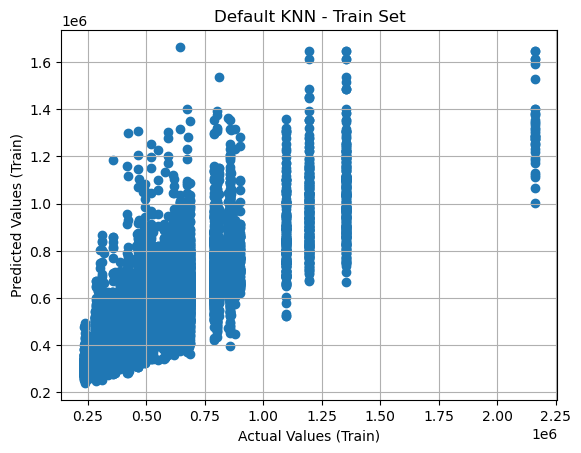

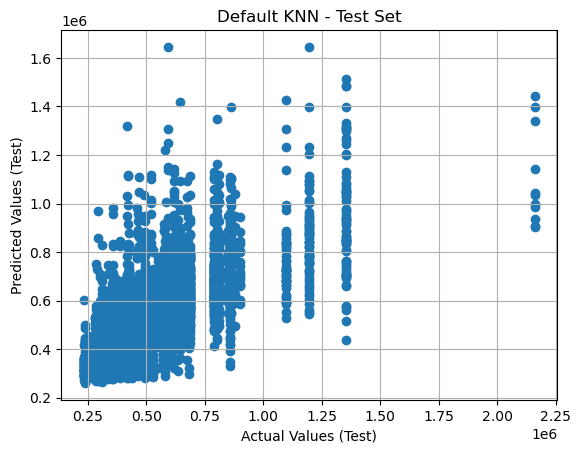

In [24]:
X = df.drop(columns="mean_zipcode_price")
y = df["mean_zipcode_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_default = KNeighborsRegressor()
model_default.fit(X_train, y_train)

y_train_pred = model_default.predict(X_train)
y_test_pred = model_default.predict(X_test)

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_train_default = r2_score_manual(y_train, y_train_pred)
r2_test_default = r2_score_manual(y_test, y_test_pred)

plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Default KNN - Train Set")
plt.grid(True)
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Default KNN - Test Set")
plt.grid(True)
plt.show()

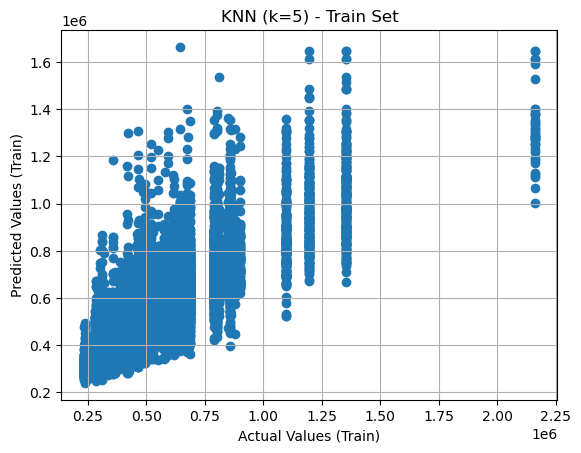

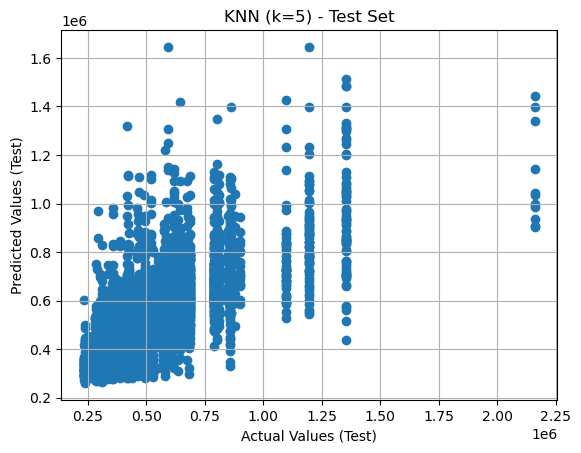

Default KNN R² Train: 0.681
Default KNN R² Test: 0.497
KNN (k=5) R² Train: 0.681
KNN (k=5) R² Test: 0.497


In [25]:
model_k5 = KNeighborsRegressor(n_neighbors=5)
model_k5.fit(X_train, y_train)

y_train_pred_k5 = model_k5.predict(X_train)
y_test_pred_k5 = model_k5.predict(X_test)

r2_train_k5 = r2_score_manual(y_train, y_train_pred_k5)
r2_test_k5 = r2_score_manual(y_test, y_test_pred_k5)

plt.scatter(y_train, y_train_pred_k5)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("KNN (k=5) - Train Set")
plt.grid(True)
plt.show()

plt.scatter(y_test, y_test_pred_k5)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("KNN (k=5) - Test Set")
plt.grid(True)
plt.show()

print(f"Default KNN R² Train: {r2_train_default:.3f}")
print(f"Default KNN R² Test: {r2_test_default:.3f}")
print(f"KNN (k=5) R² Train: {r2_train_k5:.3f}")
print(f"KNN (k=5) R² Test: {r2_test_k5:.3f}")

## Normalization

In [26]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [28]:
X_train_norm_np = normalizer.transform(X_train)
X_test_norm_np = normalizer.transform(X_test)

In [29]:
X_train_norm_df = pd.DataFrame(X_train_norm_np, columns = X_train.columns, index=X_train.index)
X_train_norm_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
6325,0.032787,0.090909,0.21875,0.126701,0.010801,0.0,0.0,0.0,0.75,0.666667,0.173862,0.000000,0.721739,0.207071,0.404578,0.014294
13473,0.023869,0.060606,0.12500,0.060374,0.002731,0.0,0.0,0.0,0.50,0.416667,0.059510,0.041494,0.252174,0.590909,0.149888,0.004996
17614,0.020131,0.090909,0.12500,0.067177,0.005983,0.2,0.0,0.0,0.50,0.416667,0.081680,0.018672,0.365217,0.732323,0.132679,0.008212
16970,0.027934,0.090909,0.28125,0.153061,0.005995,0.0,0.0,0.0,0.75,0.500000,0.115519,0.168050,0.669565,0.151515,0.241094,0.007695
20868,0.052984,0.060606,0.31250,0.123384,0.000789,0.4,0.0,0.0,0.50,0.583333,0.134889,0.061203,0.930435,0.166667,0.291000,0.011261


In [30]:
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns = X_test.columns, index=X_test.index)
X_test_norm_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
735,0.038033,0.121212,0.28125,0.151361,0.007192,0.4,0.0,0.0,0.75,0.583333,0.207701,0.000000,0.747826,0.287879,0.342626,0.008097
2830,0.103607,0.151515,0.37500,0.221939,0.005334,0.0,0.0,0.0,1.00,0.583333,0.179697,0.221992,0.669565,0.575758,0.339184,0.006469
4106,0.126295,0.121212,0.31250,0.295918,0.008909,0.4,0.0,0.5,0.50,0.833333,0.406068,0.000000,0.843478,0.025253,0.569781,0.010377
16218,0.185574,0.090909,0.43750,0.363095,0.012100,0.4,0.0,0.5,0.50,0.916667,0.498250,0.000000,0.782609,0.166667,0.628291,0.015594
19964,0.083410,0.090909,0.31250,0.192177,0.004171,0.4,0.0,0.0,0.50,0.666667,0.263711,0.000000,0.904348,0.257576,0.318534,0.003904


In [31]:
X_train_standarized_np = scaler.transform(X_train)
X_test_standarized_np = scaler.transform(X_test)

X_train_standarized_df = pd.DataFrame(X_train_standarized_np, columns = X_train.columns, index=X_train.index)
X_test_standarized_df  = pd.DataFrame(X_test_standarized_np, columns = X_test.columns, index=X_test.index)


In [32]:
X_train_standarized_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04
mean,1.410606e-16,-7.433165e-17,-1.436291e-16,-1.800500e-16,-2.383544e-17,2.434914e-17,2.342449e-17,-2.999978e-17,3.279428e-16,-2.473954e-16,-1.173279e-16,-5.270509e-17,-5.178044e-16,1.294573e-13,-3.739699e-17,2.424640e-17
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.280298e+00,-3.616365e+00,-2.756759e+00,-1.966219e+00,-3.676528e-01,-9.195998e-01,-8.499166e-02,-3.059165e-01,-3.694422e+00,-5.685488e+00,-1.820786e+00,-6.563102e-01,-2.415795e+00,-1.443508e+00,-2.325125e+00,-4.386665e-01
25%,-6.020638e-01,-3.952633e-01,-8.004954e-01,-7.097046e-01,-2.522701e-01,-9.195998e-01,-8.499166e-02,-3.059165e-01,-6.254257e-01,-5.586896e-01,-7.131942e-01,-6.563102e-01,-6.831492e-01,-8.434086e-01,-7.382489e-01,-2.776461e-01
50%,-2.428198e-01,-3.952633e-01,1.776364e-01,-1.806459e-01,-1.853577e-01,1.545009e-03,-8.499166e-02,-3.059165e-01,-6.254257e-01,-5.586896e-01,-2.750261e-01,-6.563102e-01,1.322135e-01,-2.433097e-01,-2.097797e-01,-1.856552e-01
75%,2.828357e-01,6.784371e-01,5.036804e-01,5.137437e-01,-1.079403e-01,9.226898e-01,-8.499166e-02,-3.059165e-01,9.090727e-01,2.957768e-01,5.039393e-01,5.973527e-01,8.796293e-01,7.318510e-01,5.535649e-01,-9.733376e-02
max,1.981509e+01,3.181575e+01,7.676647e+00,1.099572e+01,2.960995e+01,3.686124e+00,1.176586e+01,4.945309e+00,2.443571e+00,4.568109e+00,8.610049e+00,1.033034e+01,1.491151e+00,2.269605e+00,6.205250e+00,3.118953e+01


## Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

lin_reg = LinearRegression()

In [55]:
lin_reg2 = LinearRegression()

In [56]:
lin_reg.fit(X_train_norm_df, y_train) # Determines the b0 and b1's values

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
lin_reg2.fit(X_train_standarized_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
import pickle

with open("linear_model.pkl", "wb") as file:
    pickle.dump(lin_reg, file)

with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [59]:
y_pred_test = lin_reg.predict(X_test_norm_df)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_norm_df, y_test): .2f}") # r2_score

MAE  115721.71
MSE  27193088452.97
RMSE,  164903.27
R2 score,  0.52


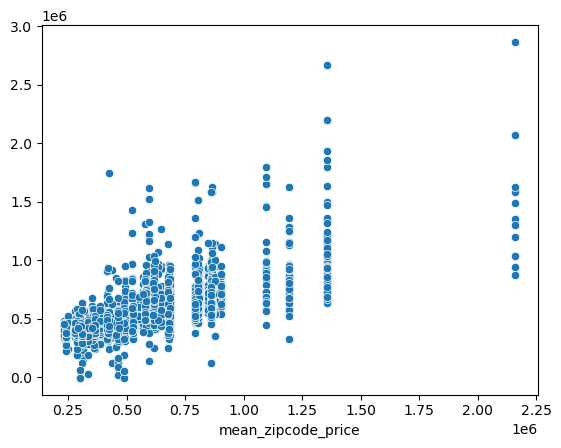

In [60]:
sns.scatterplot(x=y_test, y=y_pred_test); # y_pred_test = y_test;  y_pred_test = 0 + y_test; y_pred_test = 0 + 1 * y_test

In [61]:
y_pred_test2 = lin_reg2.predict(X_test_standarized_df)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test2, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test2, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg2.score(X_test_standarized_df, y_test): .2f}")

MAE  115721.71
MSE  27193088452.97
RMSE,  164903.27
R2 score,  0.52


In [62]:
results = pd.DataFrame({"y_test": y_test, "lin_reg": y_pred_test, "lin_reg2": y_pred_test2})
results

,y_test,lin_reg,lin_reg2
735,353608.635165,482247.883144,482247.883144
2830,619900.547170,673582.642656,673582.642656
4106,859684.779116,685049.127019,685049.127019
16218,521652.858716,846499.192292,846499.192292
19964,645231.456446,608053.841220,608053.841220
...,...,...,...
13674,423725.695067,440926.896126,440926.896126
20377,612653.610592,532185.134490,532185.134490
8805,280804.690608,403978.484971,403978.484971
10168,645507.378092,574972.041325,574972.041325


In [63]:
results_melted = results.melt(id_vars="y_test")
results_melted

,y_test,variable,value
0,353608.635165,lin_reg,482247.883144
1,619900.547170,lin_reg,673582.642656
2,859684.779116,lin_reg,685049.127019
3,521652.858716,lin_reg,846499.192292
4,645231.456446,lin_reg,608053.841220
...,...,...,...
8641,423725.695067,lin_reg2,440926.896126
8642,612653.610592,lin_reg2,532185.134490
8643,280804.690608,lin_reg2,403978.484971
8644,645507.378092,lin_reg2,574972.041325


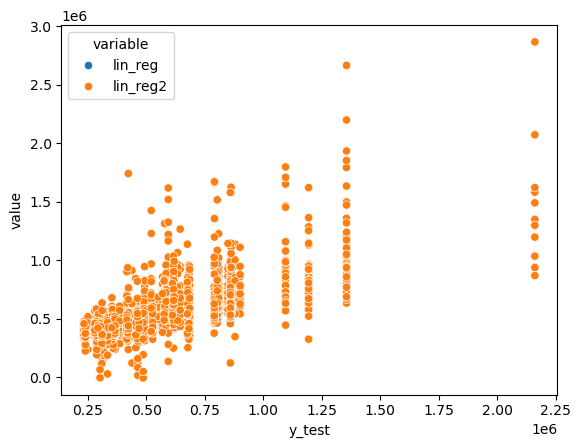

In [64]:
sns.scatterplot(data=results_melted, y="value", x="y_test", hue="variable");

In [65]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm_df.columns, lin_reg.coef_)}
lin_reg_coef

{'price': np.float64(4467715.984969751),
 'bedrooms': np.float64(266225.267822569),
 'bathrooms': np.float64(-70053.85900208082),
 'sqft_living': np.float64(-591345.3883105591),
 'sqft_lot': np.float64(-371599.7385843991),
 'floors': np.float64(102979.96137184733),
 'waterfront': np.float64(-367168.8988435649),
 'view': np.float64(-183461.43889086045),
 'condition': np.float64(-23885.83245122806),
 'grade': np.float64(145404.9575242407),
 'sqft_above': np.float64(-772972.1824470361),
 'sqft_basement': np.float64(-68433.64376787329),
 'yr_built': np.float64(-78230.03303499057),
 'zipcode': np.float64(-90942.3332086821),
 'sqft_living15': np.float64(365548.6489460259),
 'sqft_lot15': np.float64(36798.28053162861)}

In [66]:
lin_reg.intercept_

np.float64(403528.390401857)

## Decision Tree

In [67]:
tree = DecisionTreeRegressor(max_depth=10)

In [68]:
tree.fit(X_train_norm_df, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [69]:
X_train_norm_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
6325,0.032787,0.090909,0.21875,0.126701,0.010801,0.0,0.0,0.0,0.75,0.666667,0.173862,0.000000,0.721739,0.207071,0.404578,0.014294
13473,0.023869,0.060606,0.12500,0.060374,0.002731,0.0,0.0,0.0,0.50,0.416667,0.059510,0.041494,0.252174,0.590909,0.149888,0.004996
17614,0.020131,0.090909,0.12500,0.067177,0.005983,0.2,0.0,0.0,0.50,0.416667,0.081680,0.018672,0.365217,0.732323,0.132679,0.008212
16970,0.027934,0.090909,0.28125,0.153061,0.005995,0.0,0.0,0.0,0.75,0.500000,0.115519,0.168050,0.669565,0.151515,0.241094,0.007695
20868,0.052984,0.060606,0.31250,0.123384,0.000789,0.4,0.0,0.0,0.50,0.583333,0.134889,0.061203,0.930435,0.166667,0.291000,0.011261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.039738,0.090909,0.18750,0.060374,0.005492,0.0,0.0,0.0,0.50,0.500000,0.082847,0.000000,0.408696,0.626263,0.103425,0.007232
21575,0.042616,0.090909,0.31250,0.237840,0.003850,0.4,0.0,0.0,0.50,0.583333,0.326371,0.000000,0.991304,0.111111,0.435037,0.005206
5390,0.065574,0.090909,0.31250,0.155612,0.003659,0.4,0.0,0.0,0.50,0.500000,0.213536,0.000000,0.904348,0.262626,0.222165,0.002296
860,0.022295,0.030303,0.09375,0.007653,0.012437,0.0,0.0,0.0,0.50,0.333333,0.010502,0.000000,0.547826,0.843434,0.132679,0.016483


In [70]:
y_test

735      353608.635165
2830     619900.547170
4106     859684.779116
16218    521652.858716
19964    645231.456446
             ...      
13674    423725.695067
20377    612653.610592
8805     280804.690608
10168    645507.378092
2522     294111.278571
Name: mean_zipcode_price, Length: 4323, dtype: float64

In [71]:
y_pred_test_dt = tree.predict(X_test_norm_df)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test_norm_df, y_test): .2f}")

MAE,  38412.51
MSE,  6376355787.31
RMSE,  79852.09
R2 score,  0.89


In [72]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm_df.columns, tree.feature_importances_)}
tree_importance

{'price': np.float64(0.48609135726056774),
 'bedrooms': np.float64(4.4228272300379094e-05),
 'bathrooms': np.float64(0.00016044240762167283),
 'sqft_living': np.float64(0.03536856275098475),
 'sqft_lot': np.float64(0.006065341993023895),
 'floors': np.float64(0.0005285361668032844),
 'waterfront': np.float64(0.0),
 'view': np.float64(4.979788083661151e-19),
 'condition': np.float64(0.0006178590464144955),
 'grade': np.float64(0.00303385742964333),
 'sqft_above': np.float64(0.0018253461813279542),
 'sqft_basement': np.float64(6.521833669653717e-05),
 'yr_built': np.float64(0.0028296643226354864),
 'zipcode': np.float64(0.4579569410820045),
 'sqft_living15': np.float64(0.0011403916050009284),
 'sqft_lot15': np.float64(0.004272253144975097)}

In [73]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm_df.columns))
print(tree_viz)

|--- price <= 0.05
|   |--- price <= 0.04
|   |   |--- zipcode <= 0.16
|   |   |   |--- sqft_lot <= 0.00
|   |   |   |   |--- price <= 0.02
|   |   |   |   |   |--- zipcode <= 0.07
|   |   |   |   |   |   |--- value: [294111.28]
|   |   |   |   |   |--- zipcode >  0.07
|   |   |   |   |   |   |--- zipcode <= 0.13
|   |   |   |   |   |   |   |--- value: [616990.59]
|   |   |   |   |   |   |--- zipcode >  0.13
|   |   |   |   |   |   |   |--- price <= 0.02
|   |   |   |   |   |   |   |   |--- value: [462480.04]
|   |   |   |   |   |   |   |--- price >  0.02
|   |   |   |   |   |   |   |   |--- floors <= 0.50
|   |   |   |   |   |   |   |   |   |--- sqft_lot <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [462480.04]
|   |   |   |   |   |   |   |   |   |--- sqft_lot >  0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [462480.04]
|   |   |   |   |   |   |   |   |--- floors >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [462480.04]
|   |   |   |   |--- price >  

In [74]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm_df, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm_df.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'